<a href="https://colab.research.google.com/github/XojiakbarBurxonov/Data-Mining/blob/main/10_week_Decision_Tree_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Today's problem involves analyzing car data. This dataset comprises 1728 rows and 6 different attributes: buying price, price of maintenance, number of doors, capacity in terms of persons to carry, the relative size of the luggage boot, and the estimated safety value of each car.
#The Problem: You are tasked with constructing and evaluating a decision tree classifier on this dataset. Utilize and compare different types of split criteria (entropy, Gini index, loss). The decision tree will classify the type of car into one of the following categories: 1) unacceptable, 2) acceptable, 3) good, or 4) very good.

#In addition to developing an ML model, you also need to visualize a trees based on your developed models. The tree can be visualized using graphviz library.

#Note - This time, the data is split into several CSV files and stored in a zipped folder. You need to merge or concatenate the data after reading from multiple files.
#Resource for combining dataframes:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html

#Resources for drawing a tree using Graphviz:

https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html

https://canvas.anglia.ac.uk/files/4155049/download?download_frd=1



In [3]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
from IPython.display import Image
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO

In [4]:
import pydotplus
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
%matplotlib inline

In [7]:
df1=pd.read_csv("car_evaluation_0.csv")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   buyPrice     432 non-null    object
 1   maintCost    432 non-null    object
 2   noDoors      432 non-null    object
 3   noPersons    432 non-null    object
 4   bootLuggage  432 non-null    object
 5   safety       432 non-null    object
 6   decision     432 non-null    object
dtypes: object(7)
memory usage: 23.8+ KB


In [8]:
df2=pd.read_csv("car_evaluation_1.csv")
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   buyPrice     432 non-null    object
 1   maintCost    432 non-null    object
 2   noDoors      432 non-null    object
 3   noPersons    432 non-null    object
 4   bootLuggage  432 non-null    object
 5   safety       432 non-null    object
 6   decision     432 non-null    object
dtypes: object(7)
memory usage: 23.8+ KB


In [9]:
df3=pd.read_csv("car_evaluation_2.csv")
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   buyPrice     432 non-null    object
 1   maintCost    432 non-null    object
 2   noDoors      432 non-null    object
 3   noPersons    432 non-null    object
 4   bootLuggage  432 non-null    object
 5   safety       432 non-null    object
 6   decision     432 non-null    object
dtypes: object(7)
memory usage: 23.8+ KB


In [15]:
df4=pd.read_csv('car_evaluation_3.csv')
df4.sample(10)

,buyPrice,maintCost,noDoors,noPersons,bootLuggage,safety,decision
395,low,low,4,more,small,low,unacc
31,low,vhigh,3,2,med,high,unacc
65,low,vhigh,4,4,med,low,unacc
172,low,high,4,4,small,high,acc
311,low,med,5more,4,big,low,unacc
302,low,med,5more,2,big,low,unacc
246,low,med,3,2,med,med,unacc
91,low,vhigh,5more,4,small,high,acc
186,low,high,4,more,big,med,acc
263,low,med,3,more,med,low,unacc


In [26]:
df=pd.concat([df1,df2,df3,df4], ignore_index=True)


In [27]:
df.head()

,buyPrice,maintCost,noDoors,noPersons,bootLuggage,safety,decision
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   buyPrice     1727 non-null   int64
 1   maintCost    1727 non-null   int64
 2   noDoors      1727 non-null   int64
 3   noPersons    1727 non-null   int64
 4   bootLuggage  1727 non-null   int64
 5   safety       1727 non-null   int64
 6   decision     1727 non-null   int64
dtypes: int64(7)
memory usage: 94.6 KB


In [30]:
df.replace(to_replace=['low','med','high','vhigh'],value=[1,2,3,4],inplace=True)


In [31]:
df.replace(to_replace=['small','big'],value=[1,3],inplace=True)

In [32]:
df.replace(to_replace=['2','3','4','5more','more'],value=[2,3,4,5,5],inplace=True)


In [33]:
df.replace(to_replace=['unacc','acc','good','vgood'],value=[1,2,3,4],inplace=True)

In [34]:
df.head()


,buyPrice,maintCost,noDoors,noPersons,bootLuggage,safety,decision
0,4,4,2,2,1,2,1
1,4,4,2,2,1,3,1
2,4,4,2,2,2,1,1
3,4,4,2,2,2,2,1
4,4,4,2,2,2,3,1


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   buyPrice     1727 non-null   int64
 1   maintCost    1727 non-null   int64
 2   noDoors      1727 non-null   int64
 3   noPersons    1727 non-null   int64
 4   bootLuggage  1727 non-null   int64
 5   safety       1727 non-null   int64
 6   decision     1727 non-null   int64
dtypes: int64(7)
memory usage: 94.6 KB


In [43]:
columns=['buyPrice', 'maintCost', 'noDoors', 'noPersons', 'bootLuggage', 'safety', 'decision']


In [45]:
for column in columns:
  df[column] = pd.to_numeric(df[column], downcast='integer')


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   buyPrice     1727 non-null   int8 
 1   maintCost    1727 non-null   int8 
 2   noDoors      1727 non-null   int8 
 3   noPersons    1727 non-null   int8 
 4   bootLuggage  1727 non-null   int8 
 5   safety       1727 non-null   int8 
 6   decision     1727 non-null   int8 
dtypes: int8(7)
memory usage: 11.9 KB


In [49]:
X=df.drop('decision',axis=1).values
X

array([[4, 4, 2, 2, 1, 2],
       [4, 4, 2, 2, 1, 3],
       [4, 4, 2, 2, 2, 1],
       ...,
       [1, 1, 5, 5, 3, 1],
       [1, 1, 5, 5, 3, 2],
       [1, 1, 5, 5, 3, 3]], dtype=int8)

In [51]:
X.shape


(1727, 6)

AttributeError: ignored

In [48]:
y=df['decision'].values
y

array([1, 1, 1, ..., 1, 3, 4], dtype=int8)

In [52]:
y.shape

(1727,)

In [56]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=42)


In [57]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1554, 6)
(173, 6)
(1554,)
(173,)


In [58]:
clf = DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_train, y_train)

In [63]:
feature_name = df.columns[:-1]
target_name = df.columns[1]
print(feature_name,'\n')

print(target_name)


Index(['buyPrice', 'maintCost', 'noDoors', 'noPersons', 'bootLuggage',
       'safety'],
      dtype='object') 

maintCost


In [64]:
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data,feature_names=feature_name,
class_names=target_name, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

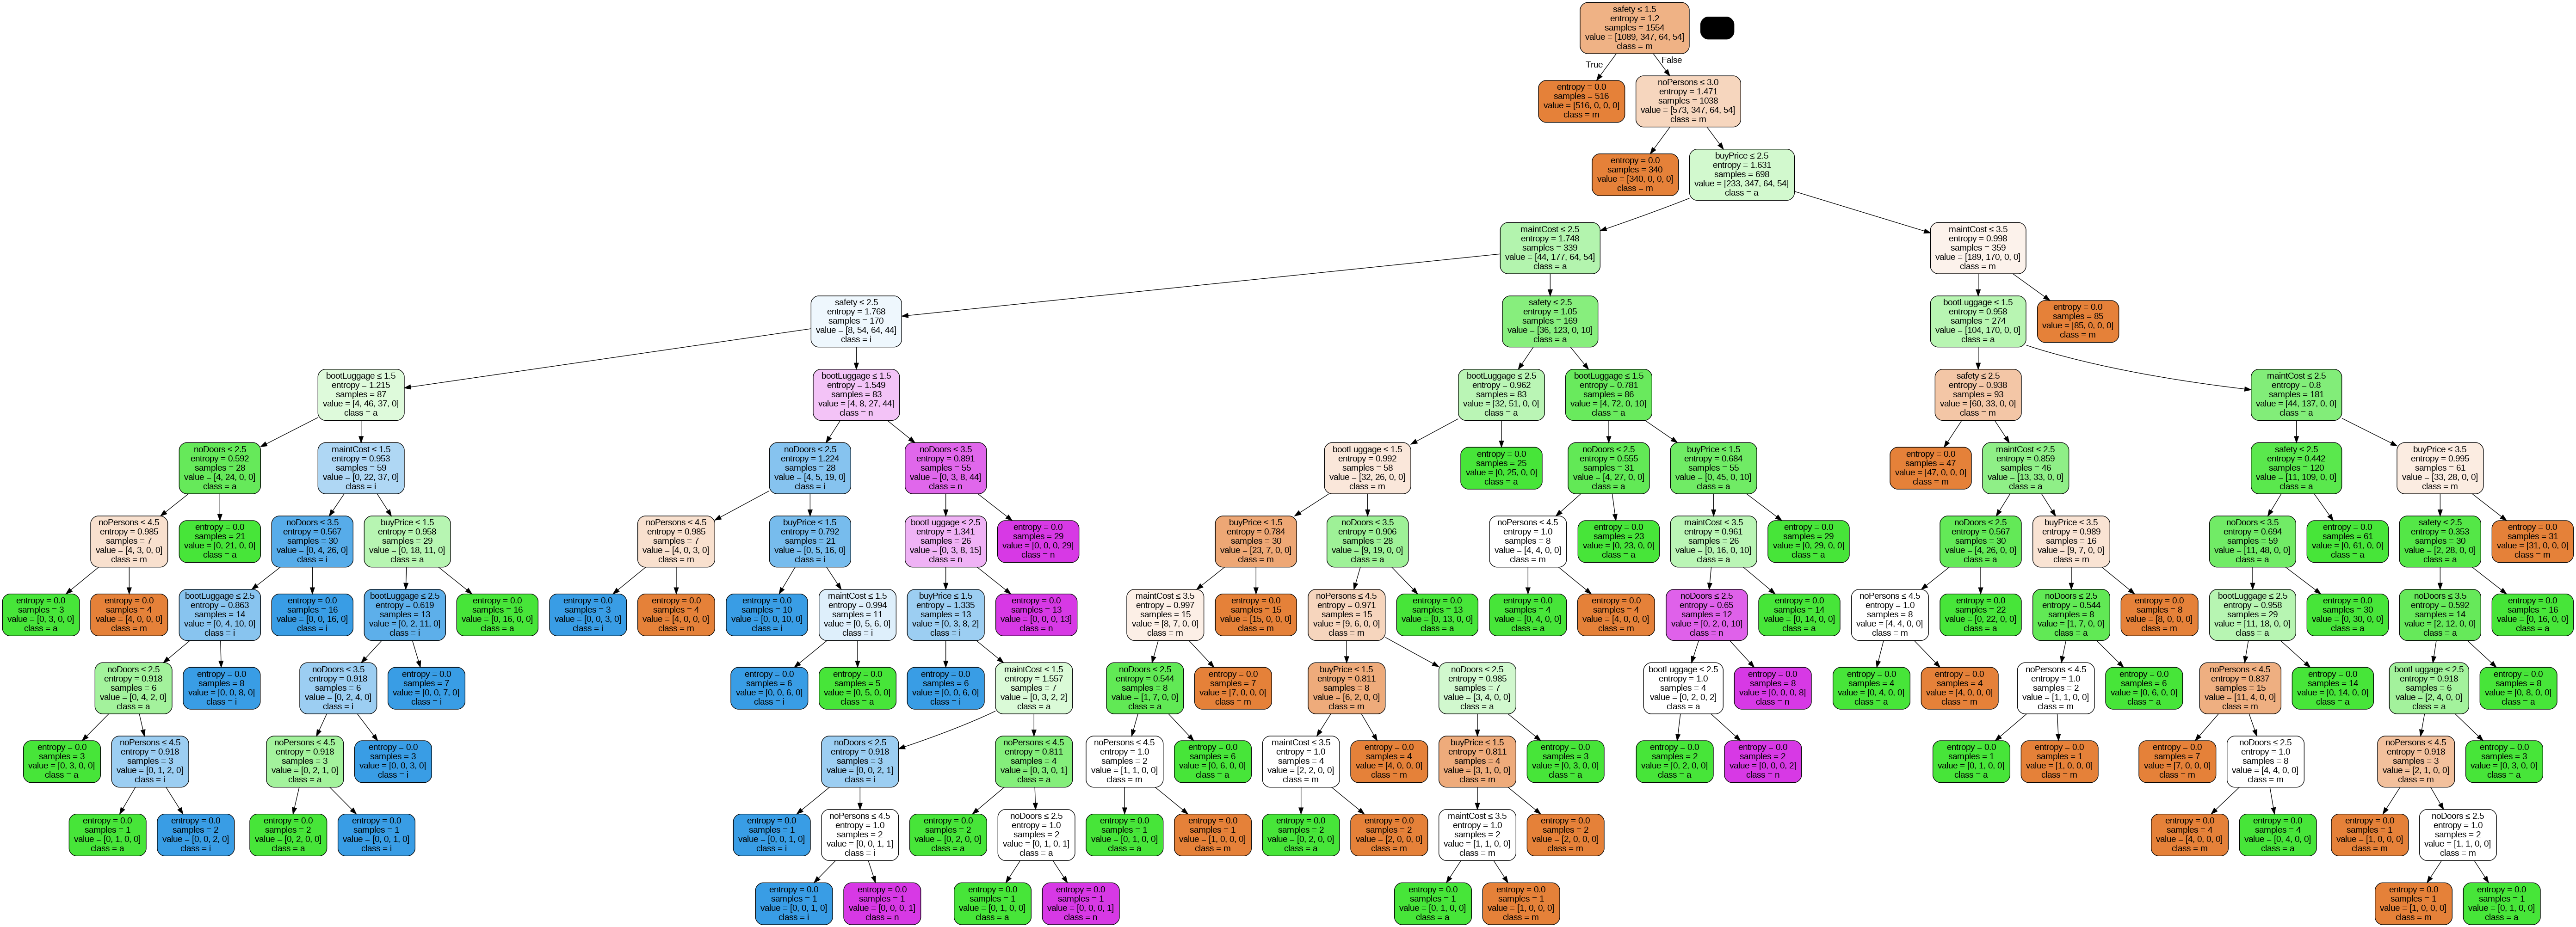

In [66]:
Image(graph.create_png())

In [1]:
################################################################################
#
#

# Your code to develop a decision tree classifier.
from google.colab import files
uploaded = files.upload()
# Check the accuracy, performance metrices, and confusion metrics.
# Draw the decision tree using Graphviz.
# You can split your code into different cells according to your own choice
#
#
################################################################################

Saving car_evaluation_1.csv to car_evaluation_1.csv


# Lab Logbook requirements. Answer the following questions and put in your lab logbook (Do not use more than 2 sentences for each question):


1.   What is the decision criterion at each node of the decision tree?
2.   How is entropy/gini index/loss change at each node?
3.   Is entropy decreasing or increasing in as we move down in tree?
4.   How many samples are left at each node? Can you see any pattern?
5.   What information is contained at leaf node?



In [ ]:
# Optional - The following is optional.

################################################################################
#
#
#Compare Decision tree performnce with SVM, KNN, and Logistic Regression.
# You can split your code into different cells according to your own choise
#
#
################################################################################